# 自然语言处理基础

## 自然语言概念
自然语言，即我们人类日常所使用的语言，是人类交际的重要方式，也是人类区别于其他动物的本质特征。  
我们只能使用自然语言与人进行交流，而无法与计算机进行交流。

## 自然语言处理
自然语言处理（NLP Natural Language Processing），是人工智能（AI Artificial Intelligence）的一部分，实现人与计算机之间的有效通信。  
自然语言处理属于计算机科学领域与人工智能领域，其研究使用计算机编程来处理与理解人类的语言。

## 应用场景
自然语言处理，具有非常广泛的应用场景，例如：
* 情感分析
* 机器翻译
* 文本相似度匹配
* 智能客服

## 通用技术
* 分词
* 停用词过滤
* 词干提取
* 词形还原
* 词袋模型
* TF-IDF
* Word2Vec

说明：  
scikit-learn库中实现的tf-idf转换，与标准的公式略有不同。并且，tf-idf结果会使用L2范数进行规范化处理。
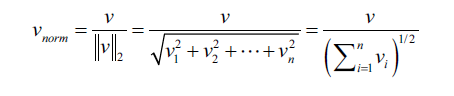

In [15]:
import numpy as np
# 对语料库中出现的词汇进行词频统计，相当于词袋模型。
# 操作方式：将语料库当中出现的词汇作为特征，将词汇在当前文档中出现的频率（次数）
# 作为特征值。
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
# 语料库
docs = np.array([
    "Where there is a will, there is a way.",
    "There is no royal road to learning.",
])
# bag是一个稀疏的矩阵。因为词袋模型就是一种稀疏的表示。
bag = count.fit_transform(docs)
# 输出单词与编号的映射关系。
print(count.vocabulary_)
# 调用稀疏矩阵的toarray方法，将稀疏矩阵转换为ndarray对象。
print(bag.toarray())

{'where': 8, 'there': 5, 'is': 0, 'will': 9, 'way': 7, 'no': 2, 'royal': 4, 'road': 3, 'to': 6, 'learning': 1}
[[2 0 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0]]


In [16]:
# 将词袋模型转换为tf-idf值。
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


# XX评论情感分析

## 项目背景
公司活动，新闻，微博，影评，商品评价等。

## 加载数据集

In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"movie.csv")
data.head()

,label,comment
0,pos,此英雄完全自给自足，没有任何超能力，自己造就自己，酷！科技以人为本，发展才是硬道理！
1,pos,如果一个男人嫌女人太聪明了，那一定是因为他自己还不够牛逼
2,pos,这是一个会搞笑，爱臭屁又喋喋不休的英雄噢！结尾那句“I am Iron Man”太帅了~~
3,pos,没想到会比这侠那侠的都要好看！2个多小时的片子并不觉长，紧凑，爽快，意犹未尽……
4,pos,想起一个人，铁臂阿木童.


## 数据预处理
### 数据清洗

In [18]:
# 缺失值探索。
data.isnull().sum(axis=0)

label      0
comment    0
dtype: int64

In [19]:
# 异常值探索。
data["label"].value_counts()

pos    11628
neg     3943
Name: label, dtype: int64

In [21]:
# 重复值
# data.duplicated().sum()
# data[data.duplicated()]
data.drop_duplicates(inplace=True)

### 数据转换
将label与comment列转换为数值类型。

In [22]:
data["label"] = data["label"].map({"pos": 1, "neg": 0})

In [23]:
data["label"].value_counts()

1    11555
0     3928
Name: label, dtype: int64

In [27]:
import jieba
# list(jieba.cut("我们来学习自然语言处理。"))
jieba.lcut("我们来学习自然语言处理。")

['我们', '来', '学习', '自然语言', '处理', '。']

In [28]:
# 用于进行中文分词的库。安装：
# pip install jieba

import jieba
import re

# 获取停用词列表
def get_stopword():
    # 默认情况下，在读取文件时，双引号会被解析为特殊的引用符号。双引号中的内容会正确解析，但是双引号不会解析为文本内容。
    # 在这种情况下，如果文本中仅含有一个双引号，会产生解析错误。如果需要将双引号作为普通的字符解析，将quoting参数设置为3。
    stopword = pd.read_csv(r"stopword.txt", header=None, quoting=3, sep="a")
    # 转换为set，这样可以比list具有更快的查询速度。
    return set(stopword[0].tolist())

# 清洗文本数据
def clear(text):
    return re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "", text)
    
# 进行分词的函数。
def cut_word(text):
    return jieba.cut(text)

# 去掉停用词函数。
def remove_stopword(words):
    # 获取停用词列表。
    stopword = get_stopword()
    return [word for word in words if word not in stopword]

def preprocess(text):
    # 文本清洗。
    text = clear(text)
    # 分词。
    word_iter = cut_word(text)
    # 去除停用词。
    word_list = remove_stopword(word_iter)
    return " ".join(word_list)

# 对文本数据（评论数据）的处理。步骤：
# 1 文本清洗。去掉一些特殊无用的符号，例如@，#。
# 2 分词，将文本分解为若干单词。
# 3 去除停用词。

# 以上步骤通过调用preprocess方法来实现。
data["comment"] = data["comment"].apply(lambda text: preprocess(text))

In [29]:
# 调用cut方法可以对文本进行分词，返回结果。cut方法返回的是生成器对象。
# jieba.cut("今天我们学习自然语言处理。")
# lcut方法返回的是列表。
# jieba.lcut("今天我们学习自然语言处理。")
data["comment"].head()

0             英雄 自给自足 超能力 造就 酷 科技 以人为本 发展 硬道理
1                        男人 嫌 女人 太 聪明 是因为 牛 逼
2    这是 搞笑 爱 臭屁 喋喋不休 英雄 噢 结尾 那句 IamIronMan 太帅
3         没想到 这侠 那侠 要好看 小时 片子 不觉 长 紧凑 爽快 意犹未尽
4                                   想起 铁臂 阿木童
Name: comment, dtype: object

In [31]:
# 使用TfidfVectorizer来进行文本向量化，具有一个局限（不足）：就是语料库中存在多少个单词，就会具有多少个特征，
# 这样会造成特征矩阵非常庞大，矩阵非常稀疏。
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(data["comment"].tolist()).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data["comment"]

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data["comment"], data["label"], test_size=0.25, random_state=0)
# TfidfVectorizer可以看做是CountVectorizer与TfidfTransformer两个类型的合体。
tfidf = TfidfVectorizer()
lr = LogisticRegression(class_weight="balanced")
# lr = LogisticRegression()
steps = [("tfidf", tfidf), ("model", lr)]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print(classification_report(y_test, y_hat))

0.8405959352394075
0.672436063032808
              precision    recall  f1-score   support

           0       0.40      0.51      0.45      1004
           1       0.81      0.73      0.77      2867

   micro avg       0.67      0.67      0.67      3871
   macro avg       0.60      0.62      0.61      3871
weighted avg       0.70      0.67      0.68      3871



In [34]:
print(pd.Series(y_test).value_counts())
print(pd.Series(y_hat).value_counts())

1    2867
0    1004
Name: label, dtype: int64
1    2585
0    1286
dtype: int64


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight="balanced")
# rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
pipe.set_params(model=rf)
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print(classification_report(y_test, y_hat))

0.9886324491904926
0.706277447687936
              precision    recall  f1-score   support

           0       0.38      0.22      0.28      1004
           1       0.76      0.88      0.82      2867

   micro avg       0.71      0.71      0.71      3871
   macro avg       0.57      0.55      0.55      3871
weighted avg       0.66      0.71      0.68      3871



In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

b = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, n_jobs=-1)
pipe.set_params(model=b)
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print(classification_report(y_test, y_hat))

0.9711505339304168
0.7075691035908034
              precision    recall  f1-score   support

           0       0.40      0.27      0.32      1004
           1       0.77      0.86      0.81      2867

   micro avg       0.71      0.71      0.71      3871
   macro avg       0.59      0.57      0.57      3871
weighted avg       0.68      0.71      0.69      3871



In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
pipe.set_params(model=ada)
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print(classification_report(y_test, y_hat))

0.7695487426799862
0.7377938517179023
              precision    recall  f1-score   support

           0       0.48      0.13      0.21      1004
           1       0.76      0.95      0.84      2867

   micro avg       0.74      0.74      0.74      3871
   macro avg       0.62      0.54      0.52      3871
weighted avg       0.69      0.74      0.68      3871

